In [9]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

from urllib.request import urlretrieve

urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x23fb39f3ec0>)

In [10]:
!pip install pandas --quiet

import pandas as pd

medical_df = pd.read_csv('medical.csv')
medical_df



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
!pip install --upgrade setuptools


Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install plotly matplotlib seaborn --quiet

In [16]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [17]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize']= (10,6)
matplotlib.rcParams['figure.facecolor']  = '#00000000'


In [18]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

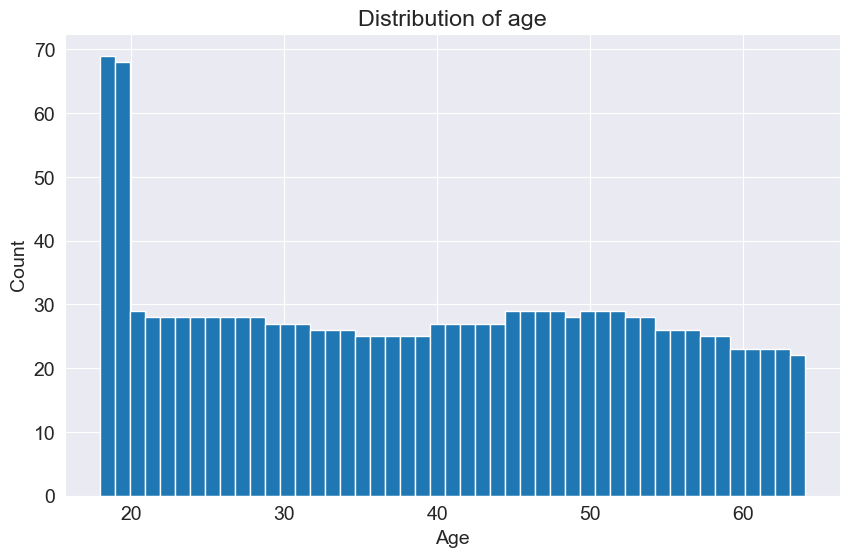

In [19]:
import matplotlib.pyplot as plt

plt.hist(medical_df['age'], bins=47)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


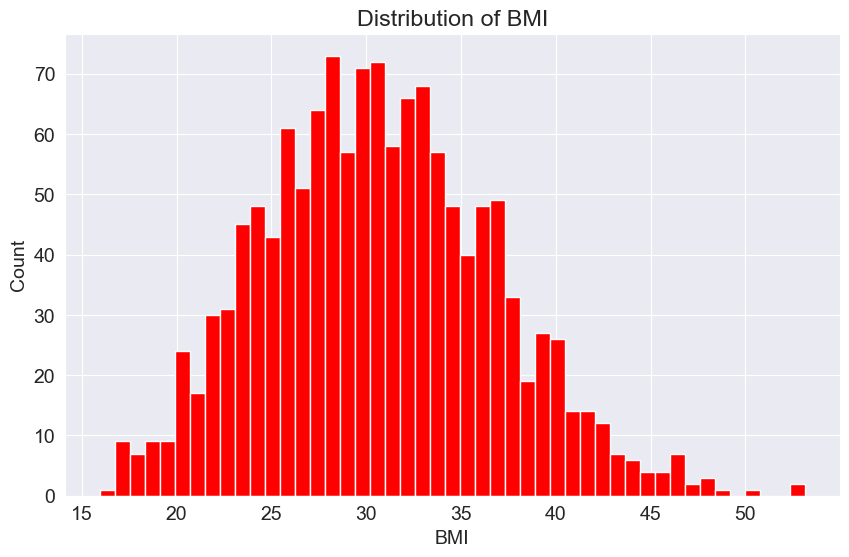

In [20]:


plt.hist(medical_df['bmi'] ,color='red' , bins =47)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

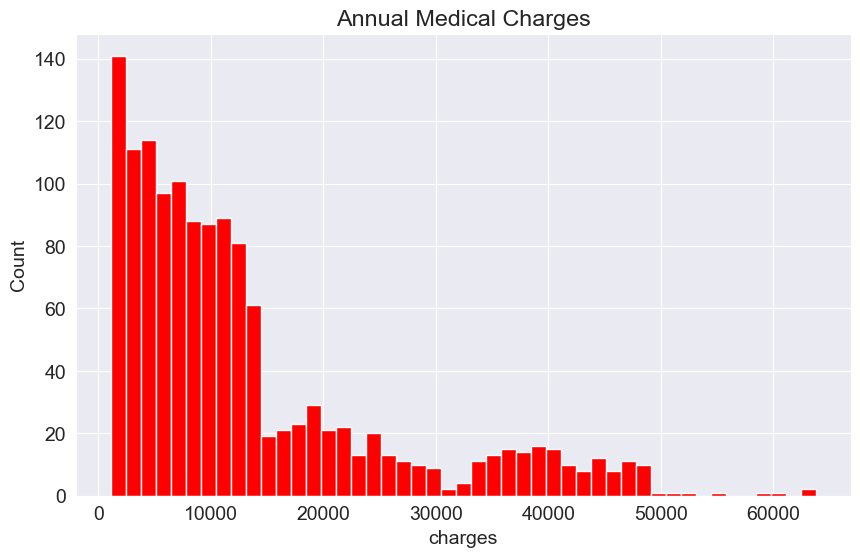

In [21]:
plt.hist(medical_df['charges'] ,color='red' , bins =47)
plt.title('Annual Medical Charges')
plt.xlabel('charges')
plt.ylabel('Count')
plt.show()

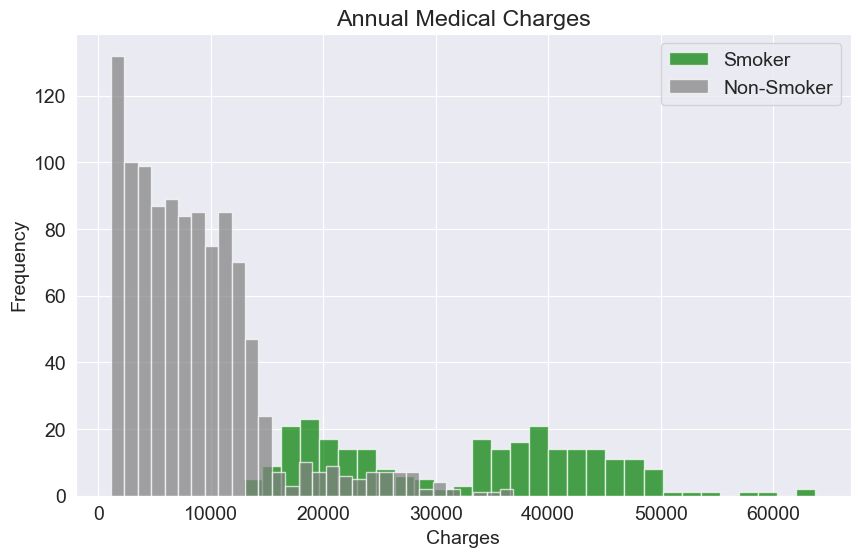

In [22]:
import matplotlib.pyplot as plt

# Separate data for smokers and non-smokers
charges_smoker = medical_df[medical_df['smoker'] == 'yes']['charges']
charges_non_smoker = medical_df[medical_df['smoker'] == 'no']['charges']

# Plot histograms
plt.hist(charges_smoker, color='green', alpha=0.7, label='Smoker', bins=30)
plt.hist(charges_non_smoker, color='grey', alpha=0.7, label='Non-Smoker', bins=30)

# Add title and labels
plt.title('Annual Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show plot
plt.show()




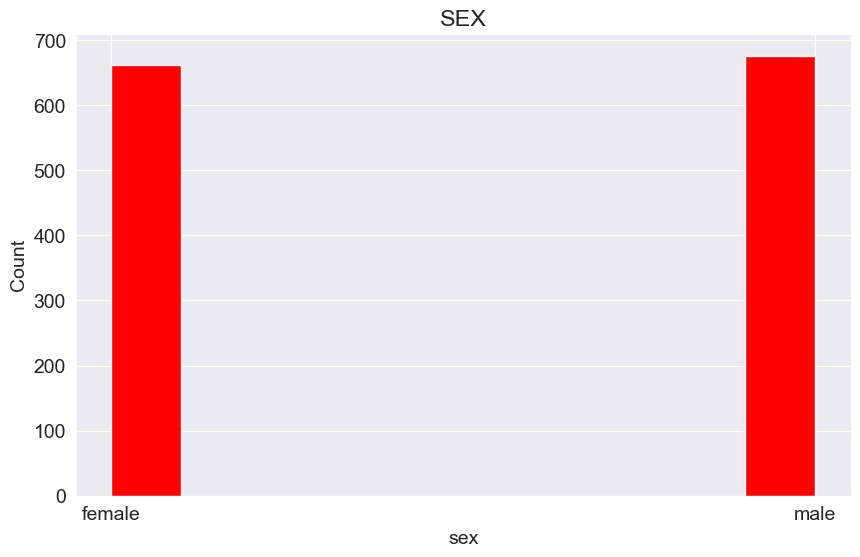

In [23]:
plt.hist(medical_df['sex'] ,color='red' )
plt.title('SEX')
plt.xlabel('sex')
plt.ylabel('Count')
plt.show()


In [24]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

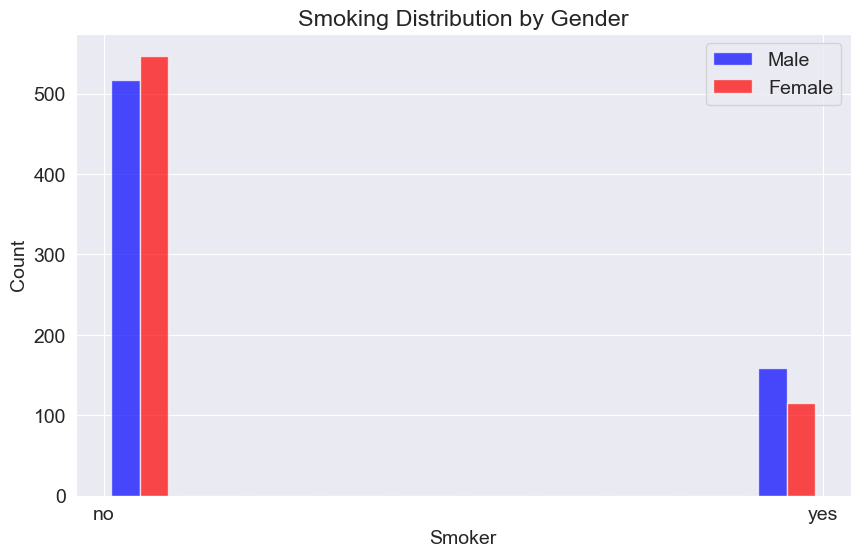

In [25]:
import matplotlib.pyplot as plt

# Filter data for male and female smokers
male_smokers = medical_df[medical_df['sex'] == 'male']['smoker']
female_smokers = medical_df[medical_df['sex'] == 'female']['smoker']

# Plot histograms for male and female smokers
plt.hist([male_smokers, female_smokers], color=['blue', 'red'], label=['Male', 'Female'], alpha=0.7)

# Add title and labels
plt.title('Smoking Distribution by Gender')
plt.xlabel('Smoker')
plt.ylabel('Count')

# Add legend
plt.legend()

# Show plot
plt.show()


In [26]:
!pip install --force-reinstall plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
  Using cached packaging-24.0-py3-none-any.whl.metadata (3.2 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
Using cached packaging-24.0-py3-none-any.whl (53 kB)
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.2.3
    Uninstalling tenacity-8.2.3:
      Successfully uninstalled tenacity-8.2.3
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: plotly
    Found existing installation: plotly 5.22.0
    Uninstalling plotly-5.22.0:
      Successfully uninstalled plotly-5.22.0


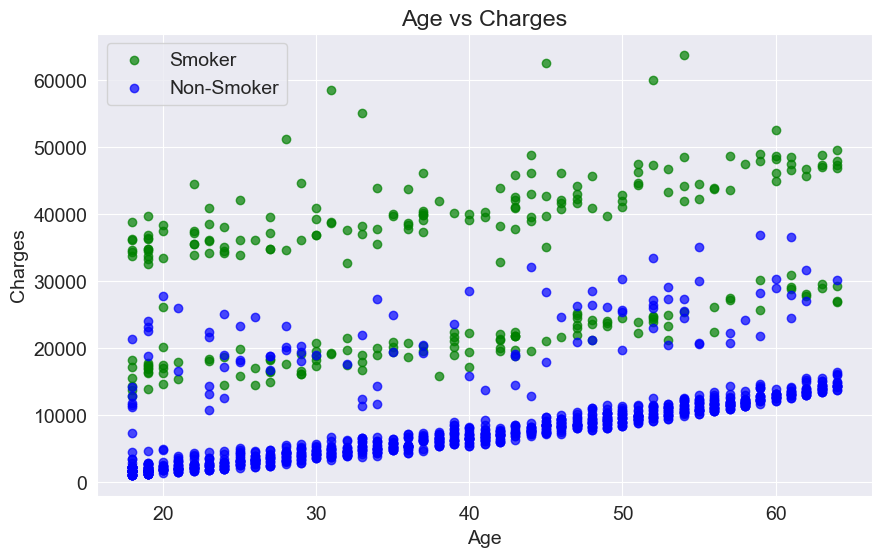

In [27]:
age_smoker = medical_df[medical_df['smoker'] == 'yes']['age']
charges_smoker = medical_df[medical_df['smoker'] == 'yes']['charges']

age_nonsmoker = medical_df[medical_df['smoker'] == 'no']['age']
charges_nonsmoker = medical_df[medical_df['smoker'] == 'no']['charges']

plt.scatter(age_smoker, charges_smoker, color='green', alpha=0.7, label='Smoker')
plt.scatter(age_nonsmoker, charges_nonsmoker, color='blue', alpha=0.7, label='Non-Smoker')

plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.legend()

plt.show()



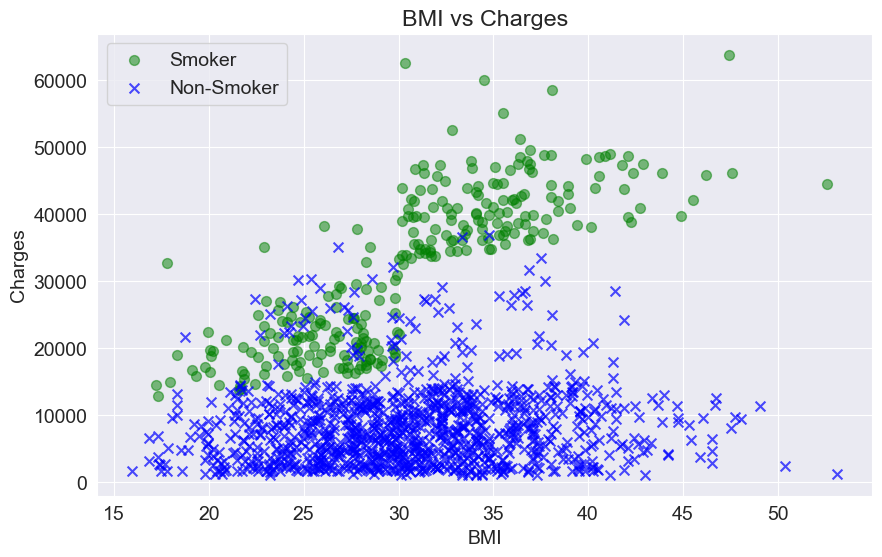

In [28]:
BMI_smoker = medical_df[medical_df['smoker'] == 'yes']['bmi']
charges_smoker = medical_df[medical_df['smoker'] == 'yes']['charges']

BMI_nonsmoker = medical_df[medical_df['smoker'] == 'no']['bmi']
charges_nonsmoker = medical_df[medical_df['smoker'] == 'no']['charges']

plt.scatter(BMI_smoker, charges_smoker, color='green', alpha=0.5, label='Smoker',marker='o', s=50)
plt.scatter(BMI_nonsmoker, charges_nonsmoker, color='blue', alpha=0.7, label='Non-Smoker',marker='x', s=50)

plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.legend()

plt.show()


In [29]:
#CORRELATION BETWEEN CHARGES AND AGE
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [30]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [31]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [32]:
smoker_values = {'no':0 , 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [33]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [34]:
# Select only numeric columns
numeric_columns = medical_df.select_dtypes(include='number')

# Calculate correlation coefficients
correlation_matrix = numeric_columns.corr()

# Print correlation matrix
print(correlation_matrix)


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


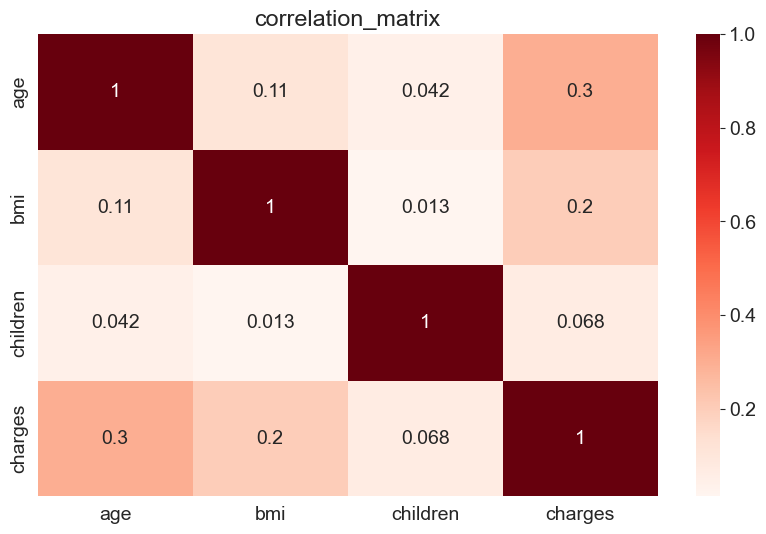

In [35]:
#the result of .corr is called corrlation matrix and if often visualized using a heatmap
sns.heatmap(correlation_matrix,cmap='Reds', annot = True)
plt.title('correlation_matrix');

In [36]:
#linear regression using a single feature

#age vs non_smoker

non_smoker_df = medical_df[medical_df.smoker =='no']

<Axes: title={'center': 'age vs. Nonsmoker'}, xlabel='age', ylabel='charges'>

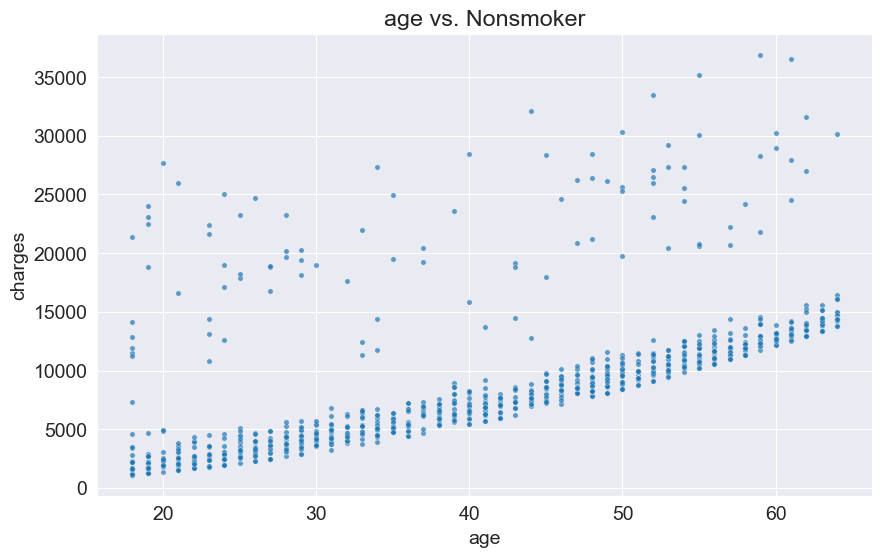

In [37]:
plt.title('age vs. Nonsmoker')
sns.scatterplot(x='age',y='charges',data = non_smoker_df, alpha =0.7,s=15)


In [38]:
def estimate_charges(age, w, b):  # our first model
    return w * age + b

#hit and trial
w = 50
b = 100
estimate_charges(40, w, b)   


2100

In [39]:
# we gonna verify where is our line going
#with the current value of w and b it is way-off and we need to find the line first

In [40]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

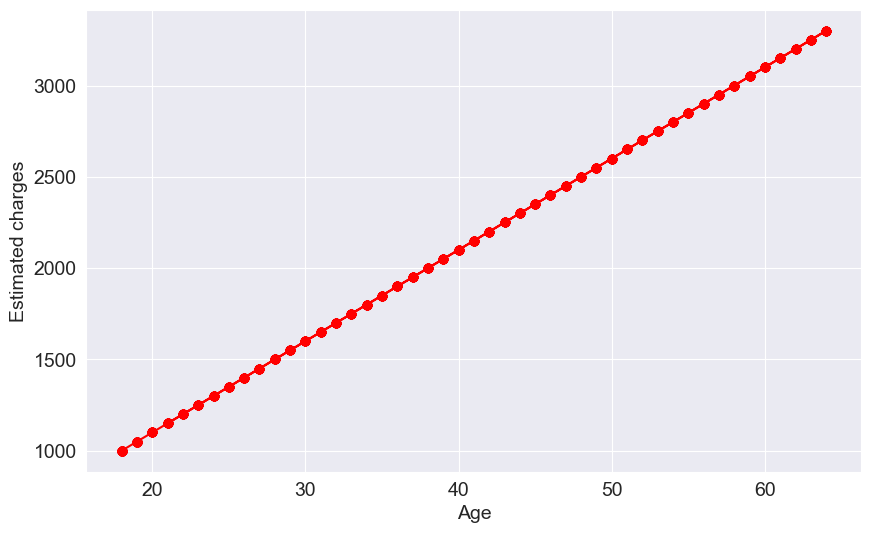

In [41]:
estimated_charges = estimate_charges(ages,w,b)   # ages here is only age who doesnt smoke
#(ages,w,b) is a numpy array , the same operator + and * will work for entire array of data
plt.plot(ages,estimated_charges,'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated charges');

In [42]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [43]:
non_smoker_df.charges  # now we can compare our estimated charges with the original charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [44]:
# now as we can see that out etimated charges and our original charges are way off

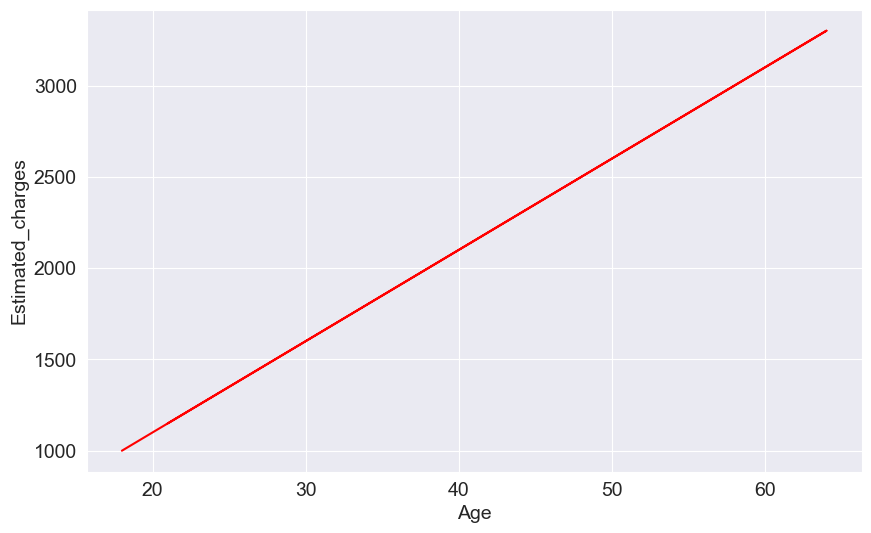

In [45]:
plt.plot(ages,estimated_charges,'r-');
plt.xlabel('Age');
plt.ylabel('Estimated_charges');

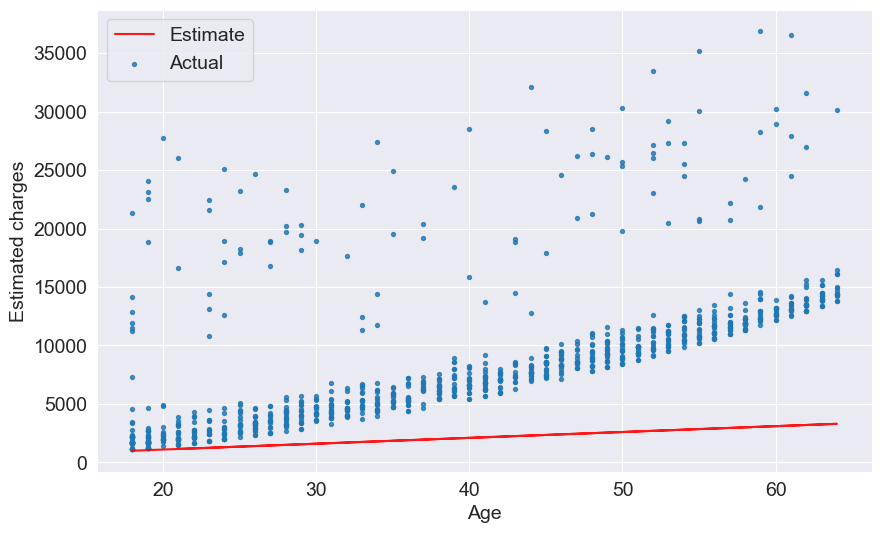

In [46]:
target = non_smoker_df.charges   #actual data

plt.plot(ages,estimated_charges,'r',alpha =0.9);

plt.scatter(ages,target,s=8,alpha =0.8);
plt.xlabel('Age');
plt.ylabel('Estimated charges')
plt.legend(['Estimate','Actual']);


In [47]:
#obviously our estimates are quite poor and the line does not 'fi' the data.
#we will try different value of w and b 

In [61]:
def try_parameters(w,b):
    ages = non_smoker_df.age                #age of people who does not smoke 
    target =non_smoker_df.charges           #charges of people who doesnt smoke
    
    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages,estimated_charges,'r',alpha = 0.9);
    plt.scatter(ages,target,s=8,alpha =0.8);
    plt.xlabel('Age');
    plt.ylabel('Estimated charges')
    plt.legend(['Estimate','Actual']);

  


RMSE Loss: 8461.949562575493


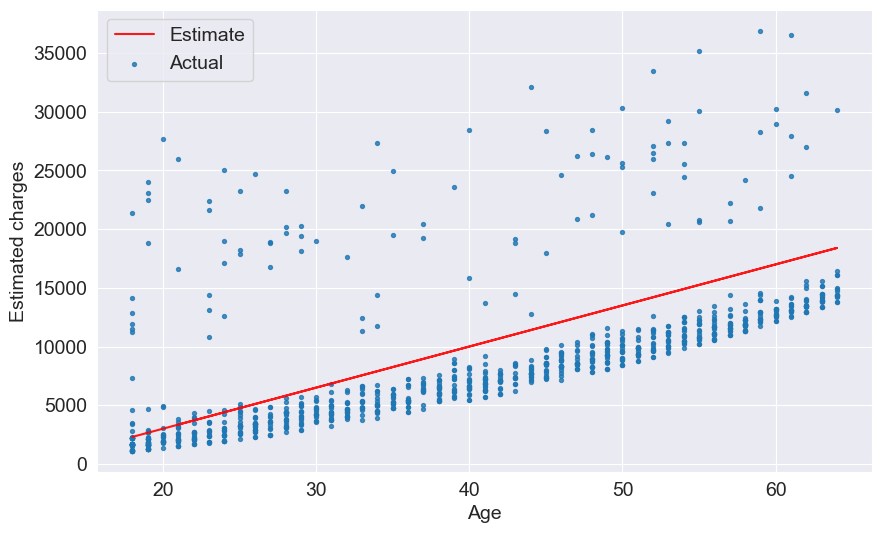

In [65]:
try_parameters(350,-4000)

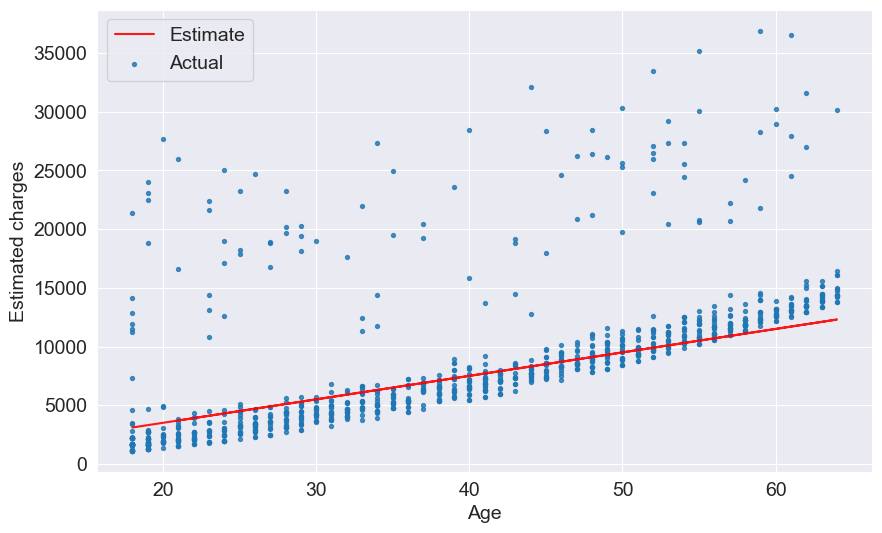

In [50]:
try_parameters(200,-500)

In [51]:
targets =non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [52]:
predictions =estimated_charges
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [53]:
!pip install numpy --quiet

In [54]:
import numpy as np

In [55]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [56]:
w =50
b=100

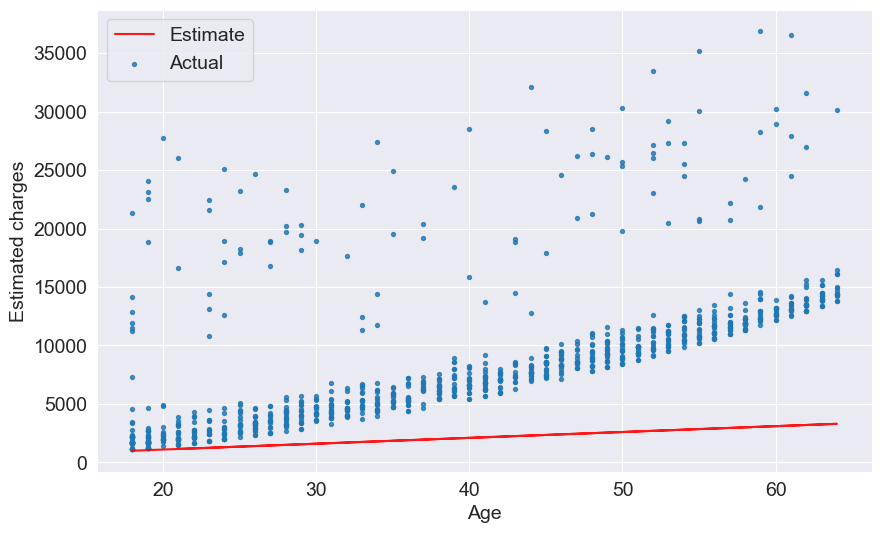

In [57]:
try_parameters(w,b)

In [58]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age,w,b)

In [60]:
rmse(targets,predicted)  #some terms(actual value -predicted value) can be negative so we take square of them to make em +ve

8461.949562575493

In [ ]:
#8461.949562575493 is also called loss as it indicates how bad the model is at predicting the taget variables
#lower the loss , better the model

In [100]:
def try_parameters(w,b):
    ages = non_smoker_df.age                #age of people who does not smoke 
    target =non_smoker_df.charges           #charges of people who doesnt smoke
    predictions = estimate_charges(ages,w,b)
    

    plt.plot(ages,predictions,'r',alpha = 0.9);
    plt.scatter(ages,target,s=8,alpha =0.8);
    plt.xlabel('Age');
    plt.ylabel('Estimated charges')
    plt.legend(['Estimate','Actual']);
    plt.show()

    loss =rmse(target,predictions)
    print('RMSE Loss:' ,loss)

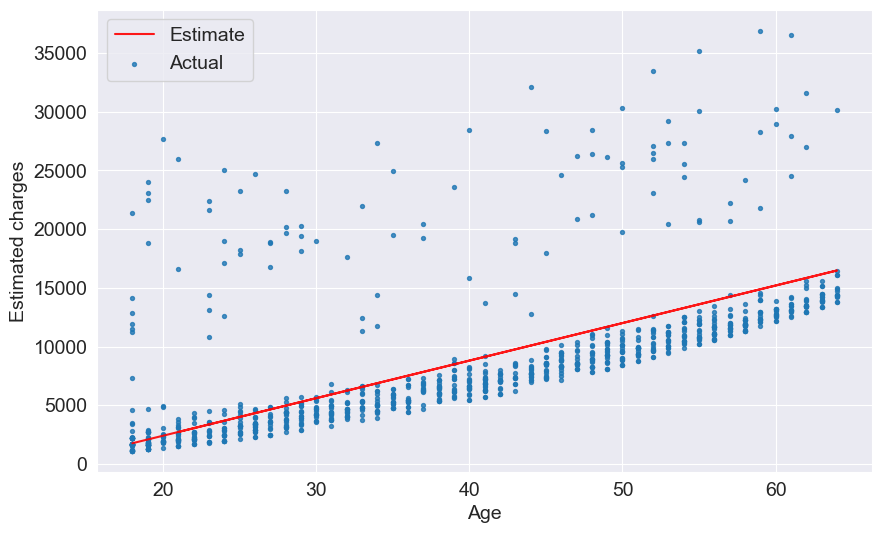

RMSE Loss: 4724.292411612061


In [101]:
try_parameters(320,-4000)

In [97]:
#2 methods we can use for finding value of w,b =  1. ordinary least squares(for small data sets)  2. stochastic gradient descent(larger data set)

In [ ]:
#scikit_learn

In [102]:
!pip install scikit-learn --quiet

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
model = LinearRegression()


In [ ]:
help(model.fit)

In [115]:
inputs = non_smoker_df[['age']]
targets =non_smoker_df.charges
print('Input.shape: ',inputs.shape)
print('targets.shape: ',targets.shape)





Input.shape:  (1064, 1)
targets.shape:  (1064,)


In [117]:
model.fit(inputs,targets)

LinearRegression()

In [119]:
model.predict(np.array(([[23],
                        [37],
                        [61]])))
              

C:\Users\Puvy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [120]:
predictions = model.predict(inputs)

In [121]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [123]:
rmse(targets,predictions)

4662.505766636395

In [124]:
#w is 
model.coef_

array([267.24891283])

In [125]:
#b is
model.intercept_

-2091.4205565650864

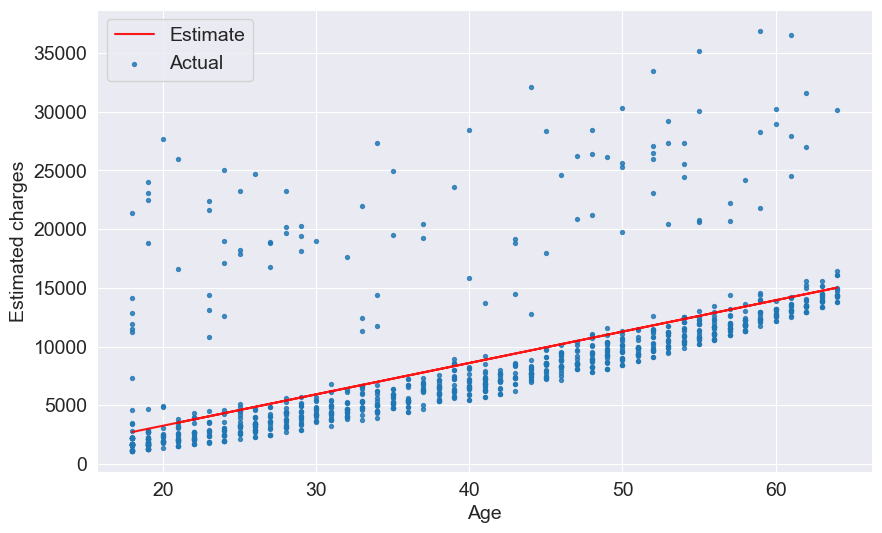

RMSE Loss: 4662.505766636395


In [126]:
try_parameters(model.coef_,model.intercept_)